### Project with bankruptcy Dataset

I began by acquiring a dataset for use in my portfolio that I could leverage to explore financial concepts. I initiated the process by downloading a dataset pertaining, which I intend to utilize to forecast bankruptcy risk based on critical financial metrics.

First step it was by read the dataset form google sheet, dowload from: [Kaggle link](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction )

#Install all necessary dependicies

I started by install all the necessary dependicies for this project that I want to use this basic classification algorithm.

In [32]:
!pip install pycaret
!pip install shap
!pip install -U imbalanced-learn

### Read dataset
I downloaded a bankruptcy dataset to predict the likelihood of bankruptcy for companies based on their financial metrics. I began by importing the dataset from a Google Sheet, which I acquired from: [Kaggle link](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction )

In [33]:
import pandas as pd

#Read form Dataset
sheet_id = "1aiqmOpNqyVio4h4mBYfz0LynVbPcudx--20S888Qzg0"
sheet_name = "db"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
df.head()
#df.columns.tolist()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


After to read the Dataset it was necessary to take some data visualization, and get some conclusions:


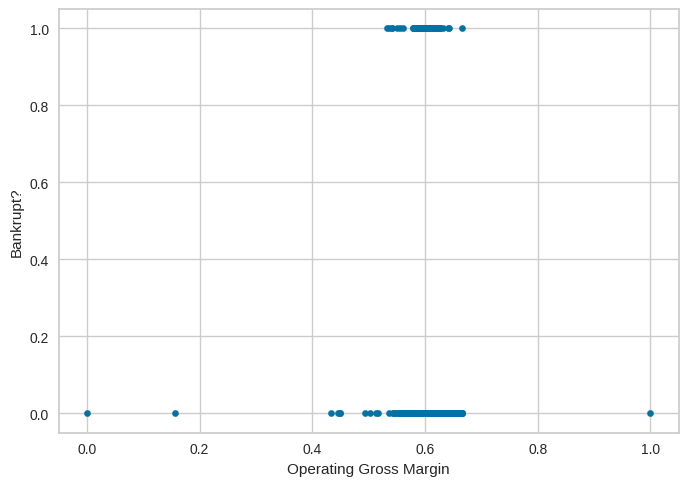

In [34]:
import matplotlib.pyplot as plt
import numpy as np

df.plot(y="Bankrupt?", x="Operating Gross Margin", kind="scatter")
plt.show()


We chech with others variables:

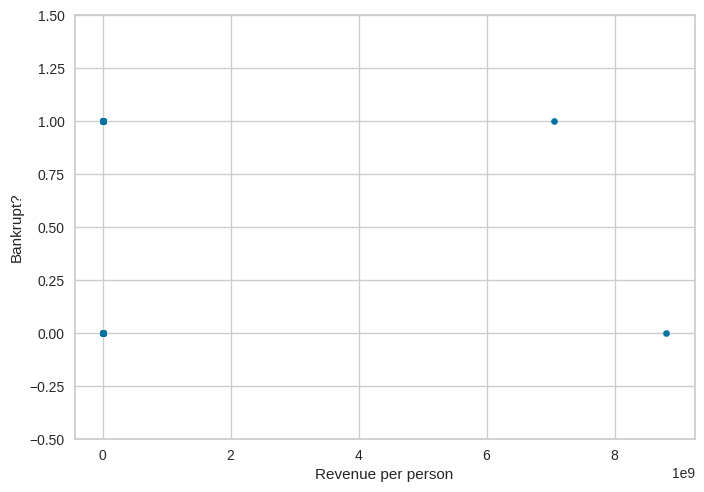

In [35]:
df.plot(ylim=(-0.5, 1.5), y="Bankrupt?", x="Revenue per person", kind="scatter")
plt.show()

In this dataset, it was necessary oversamplin, that is a technique used to artificially increase the representation of minority classes in a dataset. This is done in an attempt to improve the performance of machine learning models that are trained on that data.

Oversampling is particularly useful when dealing with imbalanced datasets, where one class is significantly more prevalent than the others.

<Axes: ylabel='Bankrupt?'>

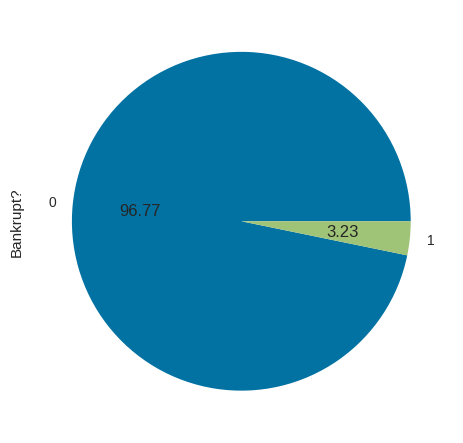

In [36]:
# check version number
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter


x = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

#In this case, it is necessary define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
y.value_counts().plot.pie(autopct='%.2f')

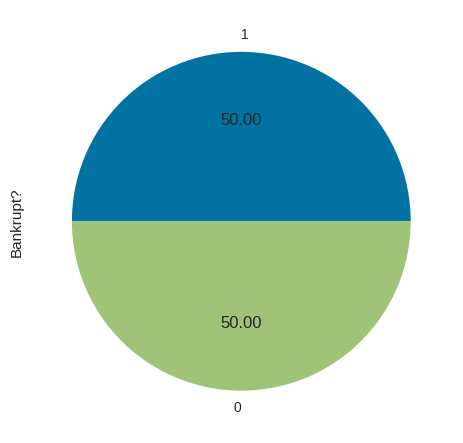

In [37]:
#Oversample code
xRes, yRes = oversample.fit_resample(x,y)
yRes.value_counts().plot.pie(autopct='%.2f')

n_df = yRes.reset_index().join(xRes)

## Apply pycaret library

To showcase the capabilities of the PyCaret library, which automates machine learning workflows.
I utilized information such as the Operating Profit Rate and Revenue per Person.

In [38]:
from pycaret.classification import *

n_df = n_df[['Bankrupt?','Operating Profit Rate', 'Revenue per person']]
cat_features = ['Operating Profit Rate', 'Revenue per person']
n_df.info()

experiment = setup(n_df, target='Bankrupt?', categorical_features=cat_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bankrupt?              13198 non-null  int64  
 1   Operating Profit Rate  13198 non-null  float64
 2   Revenue per person     13198 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 309.5 KB


,Description,Value
0,Session id,4679
1,Target,Bankrupt?
2,Target type,Binary
3,Original data shape,"(13198, 3)"
4,Transformed data shape,"(13198, 3)"
5,Transformed train set shape,"(9238, 3)"
6,Transformed test set shape,"(3960, 3)"
7,Categorical features,2
8,Preprocess,True
9,Imputation type,simple


In [39]:
#Compre all models
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9939,1.0000,1.0000,0.9880,0.9940,0.9879,0.9880,0.3150
rf,Random Forest Classifier,0.9856,0.9999,1.0000,0.9721,0.9858,0.9712,0.9716,0.4780
dt,Decision Tree Classifier,0.9805,0.9805,1.0000,0.9626,0.9809,0.9610,0.9618,0.0350
xgboost,Extreme Gradient Boosting,0.9614,0.9899,0.9989,0.9293,0.9628,0.9227,0.9254,0.0870
lightgbm,Light Gradient Boosting Machine,0.9496,0.9817,1.0000,0.9086,0.9520,0.8991,0.9038,0.8190
knn,K Neighbors Classifier,0.9433,0.9785,1.0000,0.8982,0.9463,0.8866,0.8923,0.0560
gbc,Gradient Boosting Classifier,0.8318,0.9115,0.8422,0.8252,0.8335,0.6636,0.6638,0.5010
ada,Ada Boost Classifier,0.7739,0.8541,0.7623,0.7811,0.7711,0.5477,0.5485,0.2010
lda,Linear Discriminant Analysis,0.5161,0.2670,0.0379,0.9858,0.0564,0.0323,0.0755,0.0250
svm,SVM - Linear Kernel,0.5042,0.0000,0.9675,0.5023,0.6611,0.0084,0.0173,0.2400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

After run to try compare all models and find the best match



In [40]:
#Teste the output
sample = n_df.tail(10)
sample = sample[['Operating Profit Rate', 'Revenue per person']]

preditc = predict_model(best_model, sample)
preditc

,Operating Profit Rate,Revenue per person,prediction_label,prediction_score
13188,0.998956,0.006040,1,1.0
13189,0.998948,0.024138,1,1.0
13190,0.998902,0.007608,1,1.0
13191,0.998764,0.017802,1,1.0
13192,0.998906,0.015158,1,1.0
13193,0.998965,0.083989,1,1.0
13194,0.998730,0.005890,1,1.0
13195,0.998831,0.053573,1,1.0
13196,0.997517,0.004398,1,1.0
13197,0.998284,0.021982,1,1.0


In [41]:
#save the best model
save_model(best_model, model_name='ridge-model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Operating Profit Rate...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class

## Evaluating the performance of various classification algorithms

After saving the model, I proceeded to evaluate its performance on a small sample of data.

In [ ]:
import numpy as np

model = load_model('ridge-model')
result = model.predict(sample)
result


Transformation Pipeline and Model Successfully Loaded


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

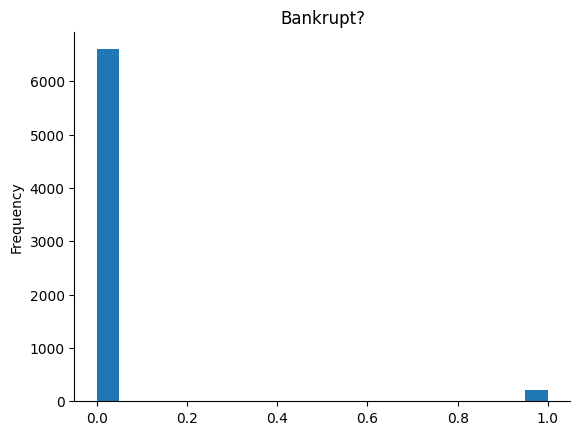

In [ ]:
from matplotlib import pyplot as plt

df['Bankrupt?'].plot(kind='hist', bins=20, title='Bankrupt?')
plt.gca().spines[['top', 'right',]].set_visible(False)